In [28]:
%matplotlib inline

In [29]:
import cv2
import numpy as np
import argparse
import matplotlib.pyplot as plt

In [30]:
input_image = [{
    'name': "01.jpg",
    'output': "01_output.jpg",
    'thres': 200,
    'blur': 4,
    'kernel_1': 30,
    'kernel_2': 5,
    'erode': 30,
    'dilate': 30,
}, {
    'name': "02.jpg",
    'output': "02_output.jpg",
    'thres': 140,
    'blur': 3,
    'kernel_1': 60,
    'kernel_2': 5,
    'erode': 45,
    'dilate': 40,
}, {
    'name': "03.jpg",
    'output': "03_output.jpg",
    'thres': 225,
    'blur': 9,
    'kernel_1': 5,
    'kernel_2': 37,
    'erode': 10,
    'dilate': 10,
}, {
    'name': "04.jpg",
    'output': "04_output.jpg",
    'thres': 220,
    'blur': 5,
    'kernel_1': 35,
    'kernel_2': 6,
    'erode': 15,
    'dilate': 2,
}, {
    'name': "05.jpg",
    'output': "05_output.jpg",
    'thres': 190,
    'blur': 5,
    'kernel_1': 60,
    'kernel_2': 15,
    'erode': 30,
    'dilate': 2,
}]

In [31]:
def compute_gradient(path):
    
    #read img
    image = cv2.imread(path)
    
    # convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # compute the Scharr gradient magnitude representation of the images
    gradX = cv2.Sobel(gray_image, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
    gradY = cv2.Sobel(gray_image, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)
    
    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)
    return gradient, image

In [32]:
def threshold_img(gradient, blur, thresh):
    blurred = cv2.blur(gradient, (blur, blur))
    (_, thresh) = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY)
    return thresh

In [33]:
def dilate_img(thresh, kernel_1, kernel_2, erode, dilate):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_1, kernel_2))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    closed = cv2.erode(closed, None, iterations = erode)
    closed = cv2.dilate(closed, None, iterations = dilate)
    return closed

In [34]:
def draw_and_write(closed, image, path_out):
    
    #draw
    (cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))
    cv2.drawContours(image, [box], -1, (0, 255, 0), 5)
    
    #write file
    plt.imshow(image, cmap='gray')
    cv2.imwrite(path_out, image)

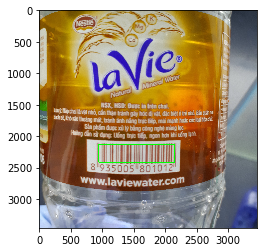

In [36]:
if __name__ == "__main__":
    for item in input_image:
        gradient, image = compute_gradient(item['name'])
        thresh = threshold_img(gradient, item['blur'], item['thres'])
        closed = dilate_img(thresh, item['kernel_1'], item['kernel_2'], item['erode'], item['dilate'])
        draw_and_write(closed, image, item['output'])
    plt.show()